This is a follow-along notebook of [Tools](https://colab.research.google.com/github/huggingface/agents-course/blob/main/notebooks/unit2/smolagents/tools.ipynb) from <a href="https://huggingface.co/learn/agents-course/unit2/smolagents/tools">Hugging Face Agents Course</a>, with additional trials. 

# Tools
Agents use tools to perform various actions. In smolagents, tools are treated as functions that an LLM can call within an agent system.

## The `@tool` Decorator  
The `@tool` decorator is the recommended way to define simple tools. Under the hood, smolagents will parse basic information about the function from Python. So if you name your function clearly and write a good docstring, it will be easier for the LLM to use.

In [1]:
# Import libraries
from smolagents import CodeAgent, LiteLLMModel, tool, Tool, load_tool

In [2]:
# Load local LLM
model = LiteLLMModel(
    model_id="ollama_chat/qwen3:8b",
    api_base="http://127.0.0.1:11434",  # Default Ollama local server
    num_ctx=8192,
)

In [8]:
# Create a tool function for unit conversion
@tool
def convert_unit(value: float, from_unit: str, to_unit: str) -> float:
    """
    Convert a value from one unit to another.

    Args:
        value: The numerical value to be converted.
        from_unit: The unit of the input value (e.g., "cm", "kg").
        to_unit: The target unit for conversion (e.g., "km", "lb").

    Returns:
        The converted value in the target unit.

    Raises:
        ValueError: If the conversion between the specified units is not supported.
    """
    
    # Define conversion rates
    conversion_rates = {
        # Length
        'mm': {'cm': 0.1, 'm': 0.001, 'km': 0.000001, 'in': 0.0393701, 'ft': 0.00328084},
        'cm': {'mm': 10, 'm': 0.01, 'km': 0.00001, 'in': 0.393701, 'ft': 0.0328084},
        'm': {'mm': 1000, 'cm': 100, 'km': 0.001, 'in': 39.3701, 'ft': 3.28084,},
        'km': {'mm': 1000000, 'cm': 100000, 'm': 1000, 'in': 39370.1, 'ft': 3280.84},
        'in': {'mm': 25.4, 'cm': 2.54, 'm': 0.0254, 'km': 0.0000254, 'ft': 0.0833333},

        # Weight
        'mg': {'g': 0.001, 'kg': 0.000001, 'lb': 0.00000220462, 'oz': 0.000035274},
        'g': {'mg': 1000, 'kg': 0.001, 'lb': 0.00220462, 'oz': 0.035274},
        'kg': {'mg': 1000000, 'g': 1000, 'lb': 2.20462, 'oz': 35.274},
        'lb': {'mg': 453592, 'g': 453.592, 'kg': 0.453592, 'oz': 16},
        'oz': {'mg': 28349.5, 'g': 28.3495, 'kg': 0.0283495, 'lb': 0.0625},
    }

    # Check if the units are valid
    if from_unit not in conversion_rates or to_unit not in conversion_rates[from_unit]:
        raise ValueError(f"Conversion from {from_unit} to {to_unit} is not supported")

    # Perform the conversion
    return value * conversion_rates[from_unit][to_unit]

# Initialize agent
agent = CodeAgent(
    tools=[convert_unit], 
    model=model
)

# Run agent
result = agent.run("What is 378952cm in inch?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is 378952cm in inch?                                                                                       │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = convert_unit(value=378952, from_unit="cm", to_unit="inch")                                              
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'result = convert_unit(value=378952, from_unit="cm", to_unit="inch")' due to: 
ValueError: Conversion from cm to inch is not supported

[Step 1: Duration 34.10 seconds| Input tokens: 2,084 | Output tokens: 286]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = convert_unit(value=378952, from_unit="cm", to_unit="in")                                                
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 149193.78135200002

[Step 2: Duration 27.77 seconds| Input tokens: 4,404 | Output tokens: 789]

In [14]:
result = agent.run("What is 9000yd in cm?")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What is 9000yd in cm?                                                                                           │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = convert_unit(value=9000, from_unit='yd', to_unit='cm')                                                  
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'result = convert_unit(value=9000, from_unit='yd', to_unit='cm')' due to: ValueError:
Conversion from yd to cm is not supported

[Step 1: Duration 19.28 seconds| Input tokens: 2,162 | Output tokens: 331]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # First convert yards to meters                                                                                  
  yards_to_meters = convert_unit(value=9000, from_unit='yd', to_unit='m')                                          
  print(f"9000 yards = {yards_to_meters} meters")                                                                  
                                                                                                                   
  # Now convert meters to centimeters                                                                              
  meters_to_cm = convert_unit(value=yards_to_meters, from_unit='m', to_unit='cm')                                  
  print(f"{yards_to_meters} meters = {meters_to_cm} centimeters")                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'yards_to_meters = convert_unit(value=9000, from_unit='yd', to_unit='m')' due to: 
ValueError: Conversion from yd to m is not supported

[Step 2: Duration 207.06 seconds| Input tokens: 4,552 | Output tokens: 3,760]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Calculate 9000 yards to centimeters manually                                                                   
  yards_to_cm = 9000 * 0.9144 * 100                                                                                
  final_answer(yards_to_cm)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 822960.0

[Step 3: Duration 40.92 seconds| Input tokens: 7,343 | Output tokens: 4,462]

In [15]:
result

822960.0

## Define a Tool as a Python Class
This approach involves creating a subclass of [`Tool`](https://huggingface.co/docs/smolagents/v1.8.1/en/reference/tools#smolagents.Tool). For complex tools, we can implement a class instead of a Python function. The class wraps the function with metadata that helps the LLM understand how to use it effectively.

In [10]:
# Create a tool class for calculating BMI and returns health status
class BMICalculatorTool(Tool):
    name = "bmi_calculator"
    description = """
    This tool calculates the Body Mass Index (BMI) based on weight and height.
    It returns a BMI category (Underweight, Normal, Overweight, or Obese)."""

    inputs = {
        "weight": {
            "type": "number",
            "description": "The weight of the person in kilograms.",
        },
        "height": {
            "type": "number",
            "description": "The height of the person in meters.",
        }
    }

    output_type = "string"

    def forward(self, weight: float, height: float):
        bmi = weight / (height ** 2)

        if bmi <= 18.5:
            return "Underweight"
        elif bmi <= 25.0:
            return "Normal"
        elif bmi <= 30.0:
            return "Overweight"
        else:
            return "Obese"

# Initialize the tool and agent
bmi_tool = BMICalculatorTool()
agent = CodeAgent(
    tools=[bmi_tool], 
    model=model
)

# Run agent
result = agent.run("Health status of a person height 1.71m and weight 80kg.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Health status of a person height 1.71m and weight 80kg.                                                         │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  bmi_category = bmi_calculator(weight=80, height=1.71)                                                            
  final_answer(bmi_category)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Overweight

[Step 1: Duration 38.09 seconds| Input tokens: 2,085 | Output tokens: 395]

In [11]:
result = agent.run("Health status of a person height 156cm and weight 130lb.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Health status of a person height 156cm and weight 130lb.                                                        │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Convert height from cm to meters                                                                               
  height_m = 156 / 100                                                                                             
                                                                                                                   
  # Convert weight from pounds to kilograms                                                                        
  weight_kg = 130 * 0.453592                                                                                       
                                                                                                                   
  # Calculate BMI category                                                                                         
  bmi_category = bmi_calculator(weight=weight_kg, height=height_m)                                                 
  final_answer(bmi_category)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Normal

[Step 1: Duration 36.11 seconds| Input tokens: 2,085 | Output tokens: 655]

In [12]:
# Add unit conversion tool for the agent
agent = CodeAgent(
    tools=[convert_unit, bmi_tool], 
    model=model
)

result = agent.run("Health status of a person height 5.6ft and weight 140lb.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Health status of a person height 5.6ft and weight 140lb.                                                        │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Convert height from feet to meters                                                                             
  height_meters = convert_unit(5.6, "ft", "m")                                                                     
  # Convert weight from pounds to kilograms                                                                        
  weight_kg = convert_unit(140, "lb", "kg")                                                                        
  # Calculate BMI                                                                                                  
  bmi_category = bmi_calculator(weight_kg, height_meters)                                                          
  final_answer(bmi_category)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'height_meters = convert_unit(5.6, "ft", "m")' due to: ValueError: Conversion from ft
to m is not supported

[Step 1: Duration 32.04 seconds| Input tokens: 2,170 | Output tokens: 515]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Manual unit conversion                                                                                         
  height_meters = 5.6 * 0.3048                                                                                     
  weight_kg = 140 * 0.453592                                                                                       
                                                                                                                   
  # Calculate BMI                                                                                                  
  bmi_category = bmi_calculator(weight_kg, height_meters)                                                          
  final_answer(bmi_category)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Normal

[Step 2: Duration 24.17 seconds| Input tokens: 4,669 | Output tokens: 938]

In [13]:
result = agent.run("Health status of a person height 1590mm and weight 1500oz.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Health status of a person height 1590mm and weight 1500oz.                                                      │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Convert height from millimeters to meters                                                                      
  height_m = convert_unit(value=1590, from_unit="mm", to_unit="m")                                                 
  print(f"Height in meters: {height_m}")                                                                           
                                                                                                                   
  # Convert weight from ounces to kilograms                                                                        
  weight_kg = convert_unit(value=1500, from_unit="oz", to_unit="kg")                                               
  print(f"Weight in kilograms: {weight_kg}")                                                                       
                                                                                                                   
  # Calculate BMI and get health status                                                                            
  bmi_result = bmi_calculator(weight=weight_kg, height=height_m)                                                   
  final_answer(bmi_result)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Height in meters: 1.59
Weight in kilograms: 42.52425

Out - Final answer: Underweight

[Step 1: Duration 35.99 seconds| Input tokens: 2,172 | Output tokens: 627]

## Share a Tool to the Hub


In [16]:
# Upload tool to Hub
convert_unit.push_to_hub("karenwky/convert_unit_tool")

README.md:   0%|          | 0.00/237 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/karenwky/convert_unit_tool/commit/789270dc9349590c53bbde7e80a42d47db647b1a', commit_message='Upload tool', commit_description='', oid='789270dc9349590c53bbde7e80a42d47db647b1a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/karenwky/convert_unit_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='karenwky/convert_unit_tool'), pr_revision=None, pr_num=None)

In [ ]:
convert_unit.inputs.items()

dict_items([('value', {'type': 'number', 'description': 'The numerical value to be converted.'}), ('from_unit', {'type': 'string', 'description': 'The unit of the input value (e.g., "cm", "kg").'}), ('to_unit', {'type': 'string', 'description': 'The target unit for conversion (e.g., "km", "lb").'})])


## Import a Tool from the Hub

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a capybara sleeping in the universe.                                                       │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator("A capybara sleeping peacefully in a vast cosmic universe, surrounded by stars and       
  galaxies, high-res, photorealistic")                                                                             
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x13E2BA7B0>

[Step 1: Duration 46.38 seconds| Input tokens: 2,067 | Output tokens: 393]

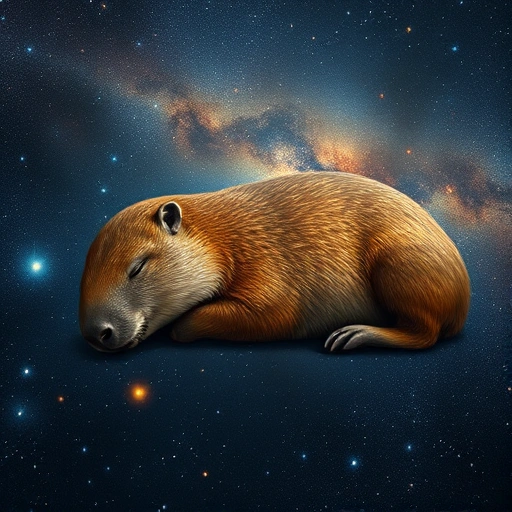

In [20]:
image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool], 
    model=model
)

agent.run("Generate an image of a capybara sleeping in the universe.")

## Import a Hugging Face Space as a Tool
You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. 

In [21]:
!pip install gradio_client

In [22]:
image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator", 
    description="Generate an image from a prompt"
)

agent = CodeAgent(
    tools=[image_generation_tool], 
    model=model
)

agent.run(
    "Imporove this prompt, then generate an image of it.", 
    additional_args={"user_prompt": "A cat diving into the deep sea happily and enjoys its adventure."}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Imporove this prompt, then generate an image of it.                                                             │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A cat diving into the deep sea happily and enjoys its adventure.'}.                            │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = f"A playful orange tabby cat dives into the deep blue sea, its fur glistening with sunlight,   
  surrounded by schools of fish and bioluminescent organisms, exuding joy and adventure."                          
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/6k/qgpm13z141912tf940j_0m700000gn/T/gradio/9ebcb32caf52c78b8ca4a640422644a93dd04b1d8b52ff3e2af
d219019e6e598/image.webp

[Step 1: Duration 57.85 seconds| Input tokens: 2,069 | Output tokens: 616]

'/private/var/folders/6k/qgpm13z141912tf940j_0m700000gn/T/gradio/9ebcb32caf52c78b8ca4a640422644a93dd04b1d8b52ff3e2afd219019e6e598/image.webp'

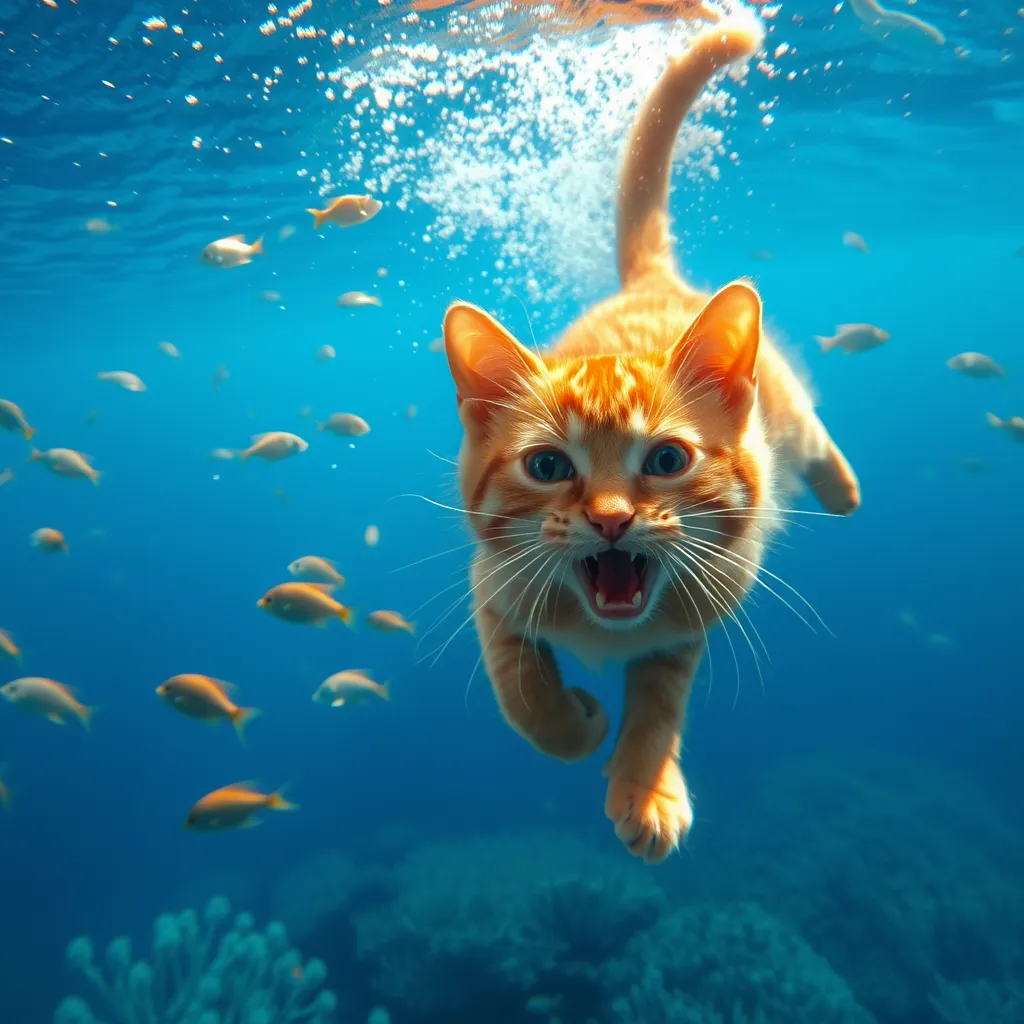

In [23]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = "/private/var/folders/6k/qgpm13z141912tf940j_0m700000gn/T/gradio/9ebcb32caf52c78b8ca4a640422644a93dd04b1d8b52ff3e2afd219019e6e598/image.webp"
img = PILImage.open(image_path)
img

## Import a LangChain Tool

In [24]:
!pip install langchain-community google-search-results

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 24.2 MB/s eta 0:00:00
  DEPRECATION: Building 'google-search-results' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'google-search-results'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32004 sha256=8d65d8247fd3525d9948905a63c9e57fc40c4de8529073099fbe3d3174f272ac
  Stored in directory: /Users/karen/Library/Caches/pip/whe

In [4]:
from langchain.agents import load_tools

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

In [5]:
search_tool

<smolagents.tools.Tool.from_langchain.<locals>.LangChainToolWrapper at 0x139054e60>

In [11]:
load_tools(["serpapi"])

[Tool(name='Search', description='A search engine. Useful for when you need to answer questions about current events. Input should be a search query.', func=<bound method SerpAPIWrapper.run of SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'google_domain': 'google.com', 'gl': 'us', 'hl': 'en'}, serpapi_api_key='83e5c962678144e449d6929f9e299a314236ddedc3369561c6167716dc8f042b', aiosession=None)>, coroutine=<bound method SerpAPIWrapper.arun of SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'google_domain': 'google.com', 'gl': 'us', 'hl': 'en'}, serpapi_api_key='83e5c962678144e449d6929f9e299a314236ddedc3369561c6167716dc8f042b', aiosession=None)>)]

In [12]:
load_tools(["serpapi"])[0]

Tool(name='Search', description='A search engine. Useful for when you need to answer questions about current events. Input should be a search query.', func=<bound method SerpAPIWrapper.run of SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'google_domain': 'google.com', 'gl': 'us', 'hl': 'en'}, serpapi_api_key='83e5c962678144e449d6929f9e299a314236ddedc3369561c6167716dc8f042b', aiosession=None)>, coroutine=<bound method SerpAPIWrapper.arun of SerpAPIWrapper(search_engine=<class 'serpapi.google_search.GoogleSearch'>, params={'engine': 'google', 'google_domain': 'google.com', 'gl': 'us', 'hl': 'en'}, serpapi_api_key='83e5c962678144e449d6929f9e299a314236ddedc3369561c6167716dc8f042b', aiosession=None)>)

In [15]:
agent = CodeAgent(tools=[search_tool], model=model)
agent.run("Search for cat actions when they feel happy. You should call `search` function with `task` argument inputting your refined search keywords.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for cat actions when they feel happy. You should call `search` function with `task` argument inputting   │
│ your refined search keywords.                                                                                   │
│                                                                                                                 │
╰─ LiteLLMModel - ollama_chat/qwen3:8b ───────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="cat happiness behaviors")                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: {'type': 'organic_result'}

[Step 1: Duration 51.49 seconds| Input tokens: 2,059 | Output tokens: 807]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Cats often show happiness through behaviors like purring, tail twitching, rubbing against people,  
  and carrying toys around.")                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Cats often show happiness through behaviors like purring, tail twitching, rubbing against 
people, and carrying toys around.

[Step 2: Duration 22.01 seconds| Input tokens: 4,241 | Output tokens: 1,114]

'Cats often show happiness through behaviors like purring, tail twitching, rubbing against people, and carrying toys around.'

# Import a Tool Collection From Any MCP Server

In [16]:
!pip install "smolagents[mcp]"

  Attempting uninstall: anyio
    Found existing installation: anyio 4.4.0
    Uninstalling anyio-4.4.0:
      Successfully uninstalled anyio-4.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [mcpadapt]3/5 [mcp]


In [ ]:
!pip install pubmedmcp==0.1.3

  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
Using cached anyio-4.9.0-py3-none-any.whl (100 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
  Attempting uninstall: anyio
    Found existing installation: anyio 3.7.1
    Uninstalling anyio-3.7.1:
      Successfully uninstalled anyio-3.7.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.27.0
    Uninstalling httpx-0.27.0:
      Successfully uninstalled httpx-0.27.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pubmedmcp]


In [19]:
import os
from smolagents import ToolCollection, CodeAgent
from mcp import StdioServerParameters

In [22]:
server_parameters = StdioServerParameters(
    command="uvx", 
    args=["--quiet", "pubmedmcp@0.1.3"],
    env={"UV_PYTHON": "3.12", **os.environ},
)

In [24]:
tool_collection = ToolCollection.from_mcp(server_parameters, trust_remote_code=True)
tool_collection

In [35]:
with ToolCollection.from_mcp(
    server_parameters, 
    trust_remote_code=True
) as tool_collection: 
    agent = CodeAgent(
        tools=[*tool_collection.tools], 
        model=model, 
        add_base_tools=True
    )
    agent.run("How does cats show they are angry?")

Exception in thread Thread-144 (_run_loop):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anyio/_core/_eventloop.py", line 162, in get_async_backend
    return loaded_backends[asynclib_name]
           ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^
KeyError: 'asyncio'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/Users/karen/Library/Python/3.12/lib/python/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mcpadapt/core.py", line 210, in _run_loop


TimeoutError: Couldn't connect to the MCP server after 30 seconds